### Forward Kinematics of Franka Emika `Panda`

In [1]:
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from mujoco_parser import MuJoCoParserClass
print ("Done.")

Done.


### Forward kinematics of `Panda` of a random pose
 Note that kinematics does not care about Laws of Motion.

In [3]:
env = MuJoCoParserClass(name='Panda',rel_xml_path='../asset/panda/franka_panda.xml',VERBOSE=False)
env.init_viewer(TERMINATE_GLFW=True,INITIALIZE_GLFW=True,window_width=0.5,window_height=0.5)
env.set_max_tick(max_tick=100)
q_list = np.zeros((env.max_tick,env.n_rev_joint))
while env.IS_ALIVE():
    rev_range = env.joint_range[env.rev_joint_idxs]
    q_rand = rev_range[:,0]+(rev_range[:,1]-rev_range[:,0])*np.random.rand(env.n_rev_joint)
    env.forward(q_pos=q_rand,q_pos_idxs=env.rev_joint_idxs)
    env.render(RENDER_ALWAYS=True)
    # Append
    q_list[env.tick-1,:] = env.get_q_pos(q_pos_idxs=env.rev_joint_idxs)
print ("Done.")

Creating window glfw
Creating window glfw
Done.


Creating window glfw
Creating window glfw
Creating offscreen glfw


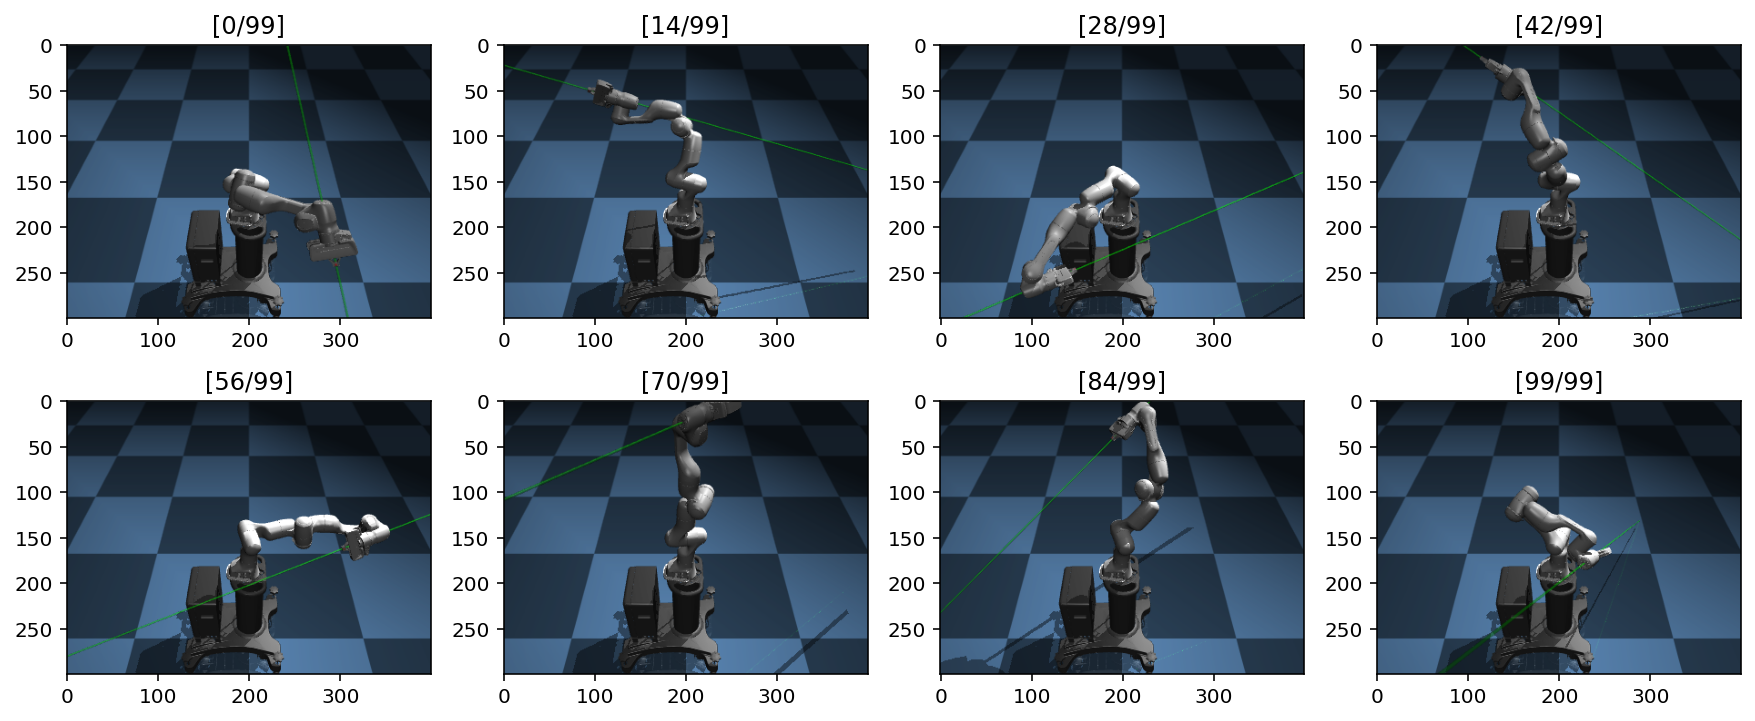

In [4]:
env.init_viewer(TERMINATE_GLFW=True,INITIALIZE_GLFW=True)
fig = plt.figure(figsize=(15,6))
for idx,tick in enumerate(np.linspace(0,env.max_tick-1,8).astype(np.int32)):
    env.forward(q_pos=q_list[tick,:],q_pos_idxs=env.rev_joint_idxs)
    img = env.plot_scene(render_w=400,render_h=300,
                         cam_distance=2.0,cam_elevation=-45,cam_lookat=[0,0,1.25],RETURN_IMG=True)
    ax = fig.add_subplot(2,4,idx+1)
    ax.imshow(img)
    ax.set_title('[%d/%d]'%(tick,env.max_tick-1),fontsize=12)